In [1]:
from shape_utils.create_mesh import create_mesh_molstar

input_list = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples/input.txt'
output_meshes = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples'
node_setup_dir ='/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/'
data_source_dir = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples/data/'
create_mesh_molstar(input_list, output_meshes,node_setup_dir,data_source_dir = None)

Processing 1cbs-A
Processing 1bvy-A
Processing 1bvy-B
Processing 1bvy-F
         mesh.points() -> mesh.vertices
         (silence this with vedo.core.warnings['points_getter']=False)


In [5]:
from shape_utils.pyhks import trimesh, hks
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors, distance_WKS, saveWKSColors
from shape_utils.functional_maps import calculate_functional_maps, compute_shape_difference
from shape_utils.pyFM_pdbe import functional 

import os
import seaborn as sns
from matplotlib import pyplot as plt

input_list = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/list_three_clusters_dirs_files.txt')
mesh_data = input_list.read().splitlines()
dim_data_matrix = len(mesh_data)
pairs_meshes = get_pairs (mesh_data)

print(len(pairs_meshes))
shape_diffs_ops =[]
FM_matrices = []

#file_mesh1 = mesh_data[0]

#for i in range(len(mesh_data)):
for pair in pairs_meshes:    
    file_mesh1 = pair[0]
    file_mesh2 = pair[1]
    #file_mesh2 = mesh_data[i]
    
    mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
    mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

    model1 = functional.FunctionalMapping(mesh1,mesh2) 


    neigvecs = 200
    ndescr = 100
    step = 1
    n_ev = 50
    output = './example_data/'
    descr = 'WKS'
    landmarks = None

    descr1,descr2,paramlist = calculate_descriptors(model1,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
    D_area,D_conformal,p2p_21,FM = calculate_functional_maps(model1,n_cpus=8,refine= None)

    shape_diffs_ops.append(D_area)
    FM_matrices.append(FM)

NameError: name 'get_pairs' is not defined

In [178]:
from shape_utils.pyhks import trimesh, hks
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors, distance_WKS, saveWKSColors
from shape_utils.functional_maps import calculate_functional_maps, compute_shape_difference
from shape_utils.pyFM_pdbe import functional 

import os
import seaborn as sns
from matplotlib import pyplot as plt

input_list = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/list_A0A075Q0W3_dirs_files.txt')
mesh_data = input_list.read().splitlines()
dim_data_matrix = len(mesh_data)
#pairs_meshes = get_pairs (mesh_data)

#print(len(pairs_meshes))
shape_diffs_ops =[]


file_mesh1 = mesh_data[3]

for i in range(len(mesh_data)):
    #file_mesh1 = pair[0]
    #file_mesh2 = pair[1]
    file_mesh2 = mesh_data[i]
    
    mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
    mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

    model1 = functional.FunctionalMapping(mesh1,mesh2) 


    neigvecs = 200
    ndescr = 100
    step = 1
    n_ev = 50
    output = './example_data/'
    descr = 'WKS'
    landmarks = None

    descr1,descr2,paramlist = calculate_descriptors(model1,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
    D_area,D_conformal,p2p_21,FM = calculate_functional_maps(model1,n_cpus=8,refine= None)

    shape_diffs_ops.append(D_area)
    


Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 23.55 s
Computing 200 eigenvectors
	Done in 19.58 s

Computing descriptors
Finished analysis of descriptors in 5.840764284133911 seconds
	Normalizing descriptors

	100 out of 100 possible descriptors kept
cpus used 8
Computing commutativity operators
	Scaling LBO commutativity weight by 3.0e-09

Optimization :
	50 Ev on source - 50 Ev on Target
	Using 100 Descriptors
	Hyperparameters :
		Descriptors preservation :1.0e+00
		Descriptors commutativity :1.0e-01
		Laplacian commutativity :1.0e-02
		Orientation preservation :0.0e+00

	Task : CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, funcall : 89, nit : 83, warnflag : 0
	Done in 1.49 seconds
 Calculating shape distance matrix

Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 22.55 s
Computing 200 eigenvectors
	Done in 17.79 s

Computing descriptors
Finished analysis of descriptors in 7.19483494758606 seconds
	Normalizing descriptors

	100 out of 100 possi

In [123]:
Q53W80_Diff_operators = shape_diffs_ops
P71447_Diff_operators = shape_diffs_ops

In [232]:
def get_non_diagonal_elements(matrix):
    non_diagonal_elements = []
    rows, cols = len(matrix), len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            if i != j:  # Exclude diagonal elements                                                                                     
                non_diagonal_elements.append(matrix[i][j])

    return non_diagonal_elements

def percentage_close_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)
    
    # Count the number of elements within the threshold
    close_elements_count = np.sum(diff_matrix < threshold)
    
    # Calculate the total number of elements in the matrix
    total_elements = rows * cols
    
    # Calculate the percentage of elements close to the identity matrix
    percentage_close = (close_elements_count / total_elements) * 100
    
    return percentage_close

def plot_array(values):
    plt.plot(values)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Plot of Array Values')
    plt.grid(True)
    plt.show()

def get_pairs(arr):
    pairs = []
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if i <= j:
                pairs.append((arr[i], arr[j]))
    return pairs
def get_pairs_two(array1, array2):
    pairs = []
    for item1 in array1:
        for item2 in array2:
            pairs.append((item1, item2))
    return pairs

In [212]:

def diff_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)

    return diff_matrix

import numpy as np

def similarity_to_diagonal(matrix):
    # Compute the Frobenius norm of the input matrix
    norm_original = np.linalg.norm(matrix)

    # Create a diagonal matrix with the same diagonal elements as the original matrix
    diagonal_matrix = np.diag(np.diag(matrix))

    # Compute the Frobenius norm of the diagonal matrix
    norm_diagonal = np.linalg.norm(diagonal_matrix)

    # Compute the similarity as the ratio of the norms
    similarity = norm_diagonal / norm_original

    return similarity

6.95189234622494 1.8652018487642132
Similarity to diagonal matrix: 0.5627629019116175
Percentage of elements close to identity: 56.00000000000001


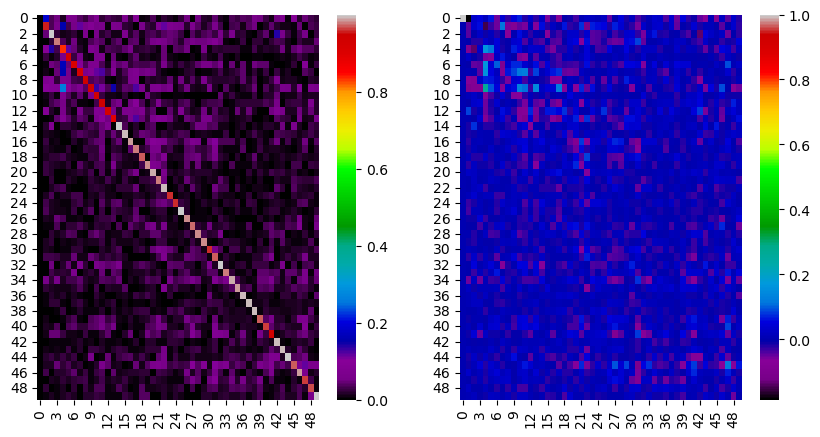

In [237]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap

#D_area = shape_diffs_ops[0]
FM = FM_matrices[12]
diff_FM = diff_to_identity(np.absolute(FM))

cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
#double_plot(mesh1,mesh2,cmap1,cmap2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

sns.heatmap(diff_FM,ax=ax1,cmap ='nipy_spectral')
sns.heatmap(FM,ax=ax2, cmap='nipy_spectral')

plt.savefig("./matrix_whitespace.png", dpi=96)


#calculate norm of F-I 
diff_FM = diff_to_identity(np.absolute(FM))
nondiag_diff_FM = get_non_diagonal_elements(diff_FM)
nondiag_FM = get_non_diagonal_elements(FM)


norm_diff_FM = norm(diff_FM,'fro')
norm_FM = norm(FM,'fro')

print(norm_diff_FM, norm_FM)

sim_diagonal= similarity_to_diagonal(FM)
per_close_identity= percentage_close_to_identity(FM)
print("Similarity to diagonal matrix:", sim_diagonal)
print("Percentage of elements close to identity:", per_close_identity)

In [240]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import napari_shape_odyssey 

eigenvalues_SDO_matrices = []
eigenvalues_FM_matrices = []

scores_FM =[]

for i in range(len(FM_matrices)): 

    #eigenvalues_SDO_matrices.append(eigenvalues_SDO)
    #eigenvalues_SDO = np.linalg.eigvals(shape_diffs_ops[i])

    eigenvalues_FM = np.linalg.eigvals(FM_matrices[i])
    eigenvalues_FM_matrices.append(np.real(eigenvalues_FM))
    #plot_array(np.real(eigenvalues_FM))

    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigenvalues_FM))) ** 2))

    scores_FM.append(result)

print(scores_FM)

eigenvalues_stack = np.stack(eigenvalues_FM_matrices)
df = pd.DataFrame(eigenvalues_stack, columns = [f'lambda_{i}' for i in range(eigenvalues_stack.shape[1])])
df.head()

dim_data_matrix = len(mesh_data)


sym_matrix = np.zeros((dim_data_matrix, dim_data_matrix))
row, col = np.triu_indices(dim_data_matrix)  # Upper triangular indices
sym_matrix[row, col] = scores_FM
sym_matrix[col, row] = scores_FM


fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(sym_matrix,ax=ax1,cmap ='nipy_spectral')


#non_diag = get_non_diagonal_elements(FM_4)
#abs_non_diag = np.absolute(non_diag)
#print(np.sum(abs_non_diag))
#diagonal_FM = np.diag(FM)
#plot_array(diagonal_FM)
#abs_diag = np.absolute(diagonal_FM)
#av_diagonal=np.sum(diagonal_FM)/len(diagonal_FM)


[0.0006314204455942196, 20.174397656408622, 18.352201864263215, 14.813599682057992, 18.33352810838068, 20.812270357567368, 22.306255075352805, 29.633646778888217, 28.999029704031837, 31.7685098896409, 26.67282290120019, 28.637910736483565, 27.89114973595743, 28.616752966772715, 29.870486104653537, 28.63546061153996, 32.29064251198067, 29.514516180421257, 27.872156784944657, 0.0003157886583334878, 19.238852679899782, 15.68004388624689, 20.095176233866106, 16.79515341278833, 23.21903646297682, 29.457699028629307, 31.960730896679056, 30.449684922916944, 28.1016715811517, 29.790468918766667, 28.585785974070777, 27.49378317286685, 28.959132662790847, 30.28223039107479, 33.51985292356931, 29.75796645374329, 25.96182770542845, 0.0005661259355422254, 17.774993342884763, 19.63219608160861, 21.70907144919, 24.09743600896742, 29.14524513109633, 30.076852987519818, 28.756237919248566, 29.83675277138798, 27.013910835541846, 28.906776722838707, 28.46185239082388, 30.197265432491776, 28.8964138363826

ValueError: shape mismatch: value array of shape (190,) could not be broadcast to indexing result of shape (10,)

In [67]:
# Fit a linear curve to every row of the dataframe and divide every value in the row by the slope of the curve

slope = []
intercept = []
for i in range(0, len(df)):
    x = np.arange(0, len(df.columns))
    y = df.iloc[i].values
    m, b = np.polyfit(x, y, 1)
    slope.append(m)
    intercept.append(b)
print(slope)
df = df.div(slope, axis=0)

[1.0000000000000002, 1.0000000000000007, 1.0, 0.9999999999999999]


In [95]:
import tqdm
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 



x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

finalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf.head()


,principal component 1,principal component 2
0,-3.397231,5.554309
1,-5.639050,-5.057551
2,6.197325,-2.453644
3,2.838956,1.956887


In [96]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))

[[1.8257921122740651e-09, 43.48121389821432, 42.64941902254939, 52.46482986188295], [43.48030723259374, 3.2718795823489943e-09, 42.765212758725596, 51.85841720331586], [42.649653820798115, 42.76475768884572, 8.943423830172373e-11, 50.438383632564175], [52.46482986193826, 51.85841720270754, 50.43838363258362, 4.314184393666809e-15]]


<AxesSubplot:>

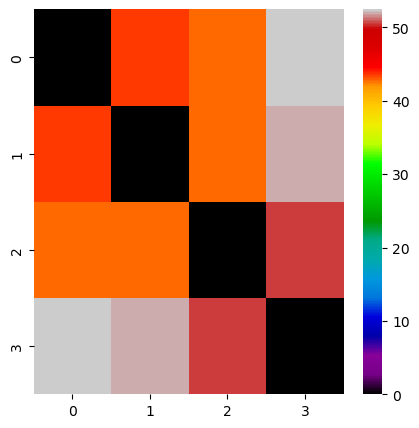

In [179]:
import numpy as np
from numpy.linalg import inv
import pandas as pd 
import matplotlib.pyplot as plt



invD_set = []
DinvD_set = []
eigenvalues_DinvD = []
geo_distances = []

for i in range(len(shape_diffs_ops)):

    invD_area = inv(shape_diffs_ops[i])
    invD_set.append(invD_area)

pairs = get_pairs_two(shape_diffs_ops,invD_set)

dist_mat_dim = (len(shape_diffs_ops))

for pair in pairs:
    DinvD = np.matmul(pair[0],pair[1])
    DinvD_set.append(DinvD)

for elem in DinvD_set:
    eigenvalues = np.linalg.eigvals(elem)
    eigenvalues_DinvD.append(np.real(eigenvalues))

#plot_array(np.real(eigenvalues_DinvD[1328]))

for eigs in eigenvalues_DinvD:
    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigs))) ** 2))
    geo_distances.append(result)

dist_matrix =[]
dist_matrix_row = []

group_size = dist_mat_dim
dist_matrix = [geo_distances[i:i+group_size] for i in range(0, len(geo_distances), group_size)]

print(dist_matrix)

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(dist_matrix,ax=ax1,cmap ='nipy_spectral')

